In [1]:
from connattractor import analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connfile = '../data_in/ex_connectome_partial_correlation.csv'
mtx = pd.read_csv(connfile).iloc[:,1:]

## Sweep beta with adjusted noise

In [3]:
simresults = dict()
hopfield_embeddings = dict()

i = 0
for beta, noise_coef in [(0.04, 0.35), (0.05, 0.5), (0.055, 0.7), (0.06, 0.8), (0.065, 0.9)]:
    simresults[beta] = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=100000, beta=beta)
    hopfield_embeddings[beta] = analysis.create_embeddings(simresults[beta], attractor_sample=1000)
    

100%|██████████| 1000/1000 [01:18<00:00, 12.67it/s]


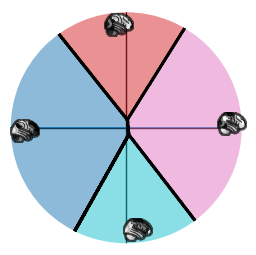

In [ ]:

for beta, noise_coef in [(0.04, 0.35), (0.05, 0.5), (0.06, 0.8), (0.065, 0.9)]:
    
    fig, ax = plt.subplots(figsize=(3, 3), subplot_kw={'projection': 'polar'})
    hopfield_embeddings[beta].plot( ax= ax,
                        attractor_plot_type='glassbrain', attractor_kwargs=dict(cmap='binary'),
                        regimes_fill_kwargs=dict(alpha=0.5),
                        regimes_contour_kwargs=dict(alpha=1.0, linewidths=2, colors='black')
                       )
    ax.set_yticks([])
    plt.show()